In [89]:
from tools import analysistools as atools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random

In [84]:
xyzapath = '/Users/joelforster/Projects/optidb/clus/rebuilds'

In [85]:
xyzas = [os.path.join(xyzapath,f) for f in filter(lambda x: '.xyza' in x, os.listdir(xyzapath))]

In [116]:
nxyzas = filter(lambda c: '-1' in c, xyzas)
bxyzas = filter(lambda c: '-1' not in c, xyzas)

In [107]:
# contacts = [atools.measureLigandContact(f) for f in random.sample(xyzas,10)]

In [150]:
nonBudContacts = [atools.measureLigandContact(f) for f in random.sample(nxyzas,25)]
budContacts = [atools.measureLigandContact(f) for f in random.sample(bxyzas,25)]

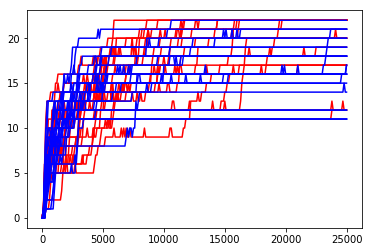

In [151]:
for contact in budContacts:
    plt.plot([i[0] for i in contact[0]],[i[1] for i in contact[0]],color='red')
for contact in nonBudContacts:
    plt.plot([i[0] for i in contact[0]],[i[1] for i in contact[0]],color='blue')

In [157]:
njitters = [atools.jitterLigandContact(c[0],5,'full') for c in nonBudContacts]
bjitters = [atools.jitterLigandContact(c[0],5,'full') for c in budContacts]

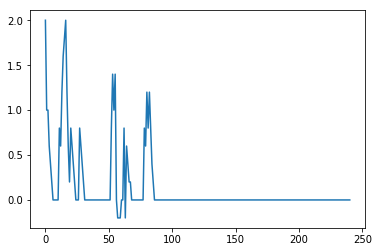

In [179]:
plt.plot(bjitters[5][1])

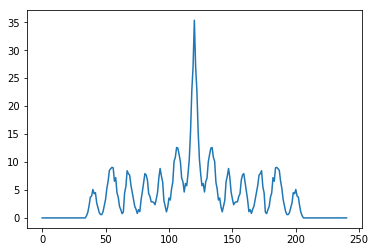

In [183]:
corr = np.correlate(bjitters[5][1],bjitters[5][1],mode='same')
plt.plot(corr)

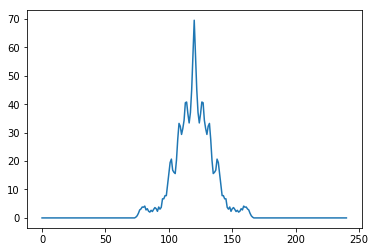

In [184]:
corr = np.correlate(njitters[5][1],njitters[5][1],mode='same')
plt.plot(corr)

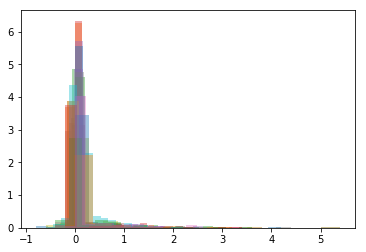

In [163]:
nmeans = []
nsds = []
for c in njitters:
    sns.distplot(c[1][:],kde=False,norm_hist=True)
    nmeans.append(np.mean(c[1]))
    nsds.append(np.std(c[1]))

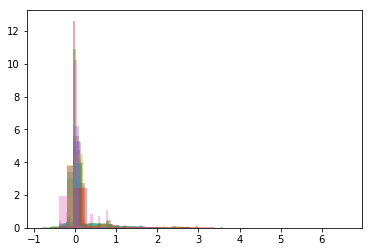

In [164]:
bmeans = []
bsds = []
for c in bjitters:
    sns.distplot(c[1][:],kde=False,norm_hist=True)
    bmeans.append(np.mean(c[1]))
    bsds.append(np.std(c[1]))

In [165]:
print(np.mean(bmeans),np.mean(nmeans))

(0.13141908713692912, 0.10698755186721963)


In [166]:
print(np.mean(bsds),np.mean(nsds))

(0.4225336909464522, 0.4008961458062447)
